# 可控 频率 PL nco + dc nco 信号生成演示
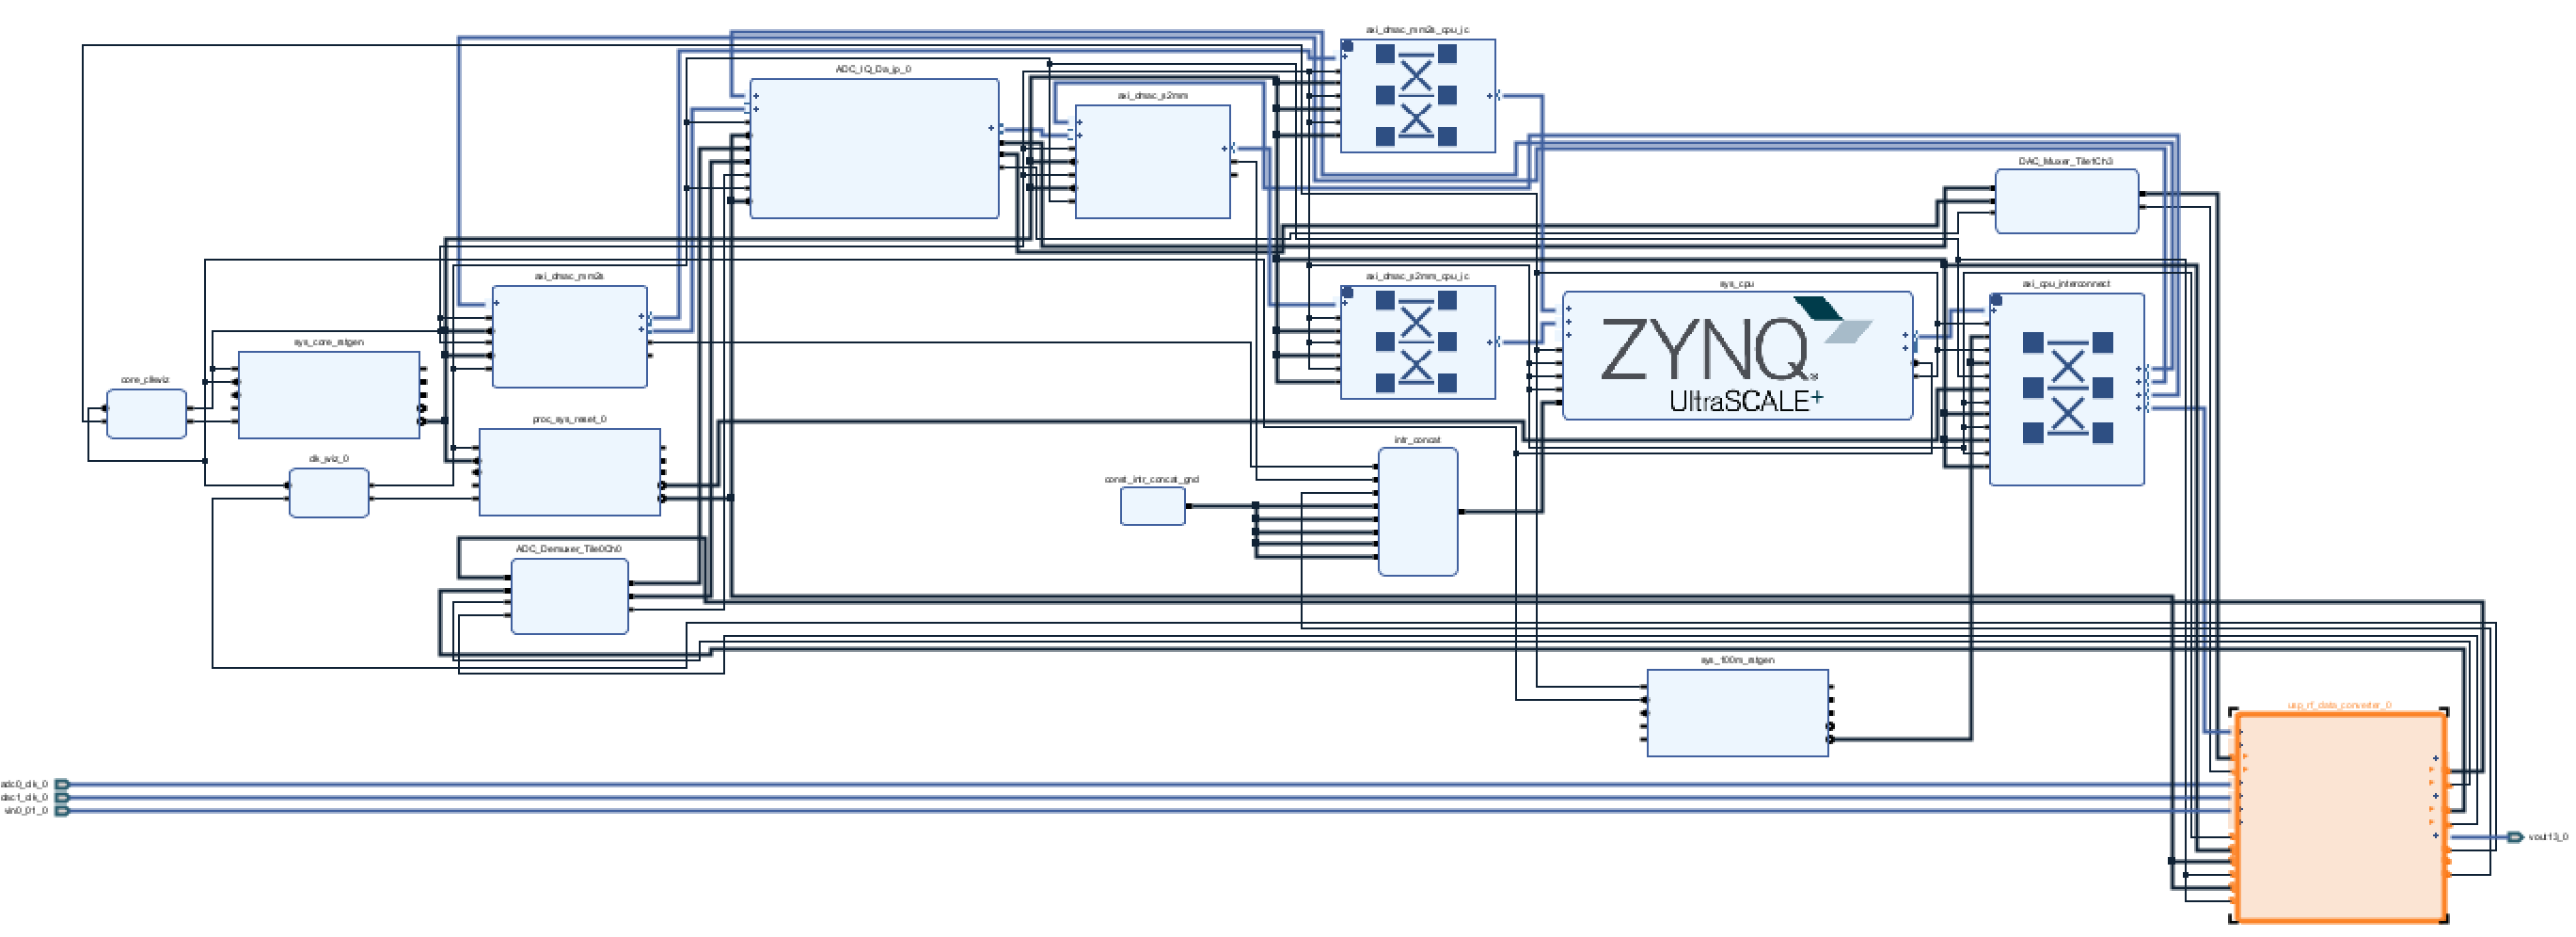
https://ww2.mathworks.cn/help/hdlcoder/ug/hdl-IQ-mixer-mode-capture.html
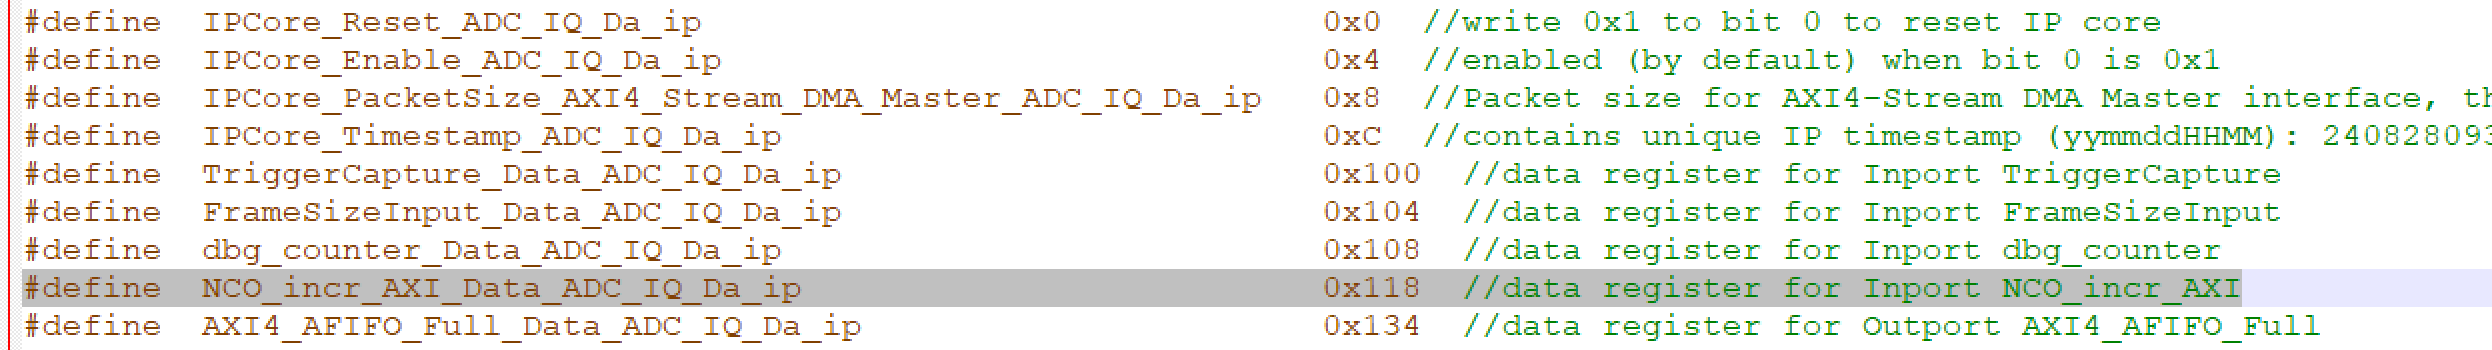

In [1]:
import xrfdc

In [2]:
from pynq import Overlay, clocks

In [3]:
ol = Overlay('/home/xilinx/pynq/rfsoc_pl_NCO/nco.bit')

In [4]:
# ol.ip_dict

In [5]:
clocks.set_custom_lmclks('/home/xilinx/jupyter_notebooks/rfsoc_pl_NCO/xrfclk')

In [6]:
# dac_tile0 = ol.usp_rf_data_converter_0.dac_tiles[0]
dac_tile1 = ol.usp_rf_data_converter_0.dac_tiles[1]

In [7]:
# dac_tile0.DynamicPLLConfig(1, 128, 2048)
dac_tile1.DynamicPLLConfig(1, 128, 2048)

In [8]:
t1b3 = dac_tile1.blocks[3]

In [9]:
# t1b3_mix_set = t1b3.MixerSettings
# t1b3_mix_set

In [10]:
# t1b3.MixerSettings['CoarseMixFreq'] = 1

In [11]:
# dac_tile0.StartUp()
# dac_tile1.StartUp()

In [12]:
from pynq import MMIO

In [13]:
tone_gen = MMIO(ol.ip_dict['ADC_IQ_Da_ip_0']['phys_addr'], ol.ip_dict['ADC_IQ_Da_ip_0']['addr_range'])

In [14]:
NCO_inc = tone_gen.read(0x118)
NCO_inc

0

In [15]:
tone_gen.write(0x118, 3200)

In [16]:
NCO_inc = tone_gen.read(0x118)
NCO_inc

3200

In [17]:
tone_gen.write(0x4,1)

In [18]:
enable = tone_gen.read(0x4)
enable

0